## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape, x_test.shape)
print(len(x_train))

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
# x_train = x_train.reshape((len(x_train), -1))
# x_test = x_test.reshape((len(x_test), -1))

#print(x_train.shape, x_test.shape)

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

(50000, 32, 32, 3) (10000, 32, 32, 3)
50000


In [4]:
x_train.shape[1:]

(32, 32, 3)

In [5]:
def build_mlp(x_train):
    """Code Here
    建立你的神經網路
    """
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=256, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

model_adam = build_mlp(x_train)
model_sgd = build_mlp(x_train)

print(model_adam.summary)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000001FE304E0390>>


In [6]:
"""
Compile 模型
"""
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

models = [model_adam, model_sgd]
model_name = ['Adam', 'SGD']

In [7]:
"""
設定要訓練的 Epoch 數
"""
for md in models:
    md.fit(x_train, y_train, 
              epochs=500, 
              batch_size=512, 
              validation_data=(x_test, y_test), 
              shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6744 - acc: 0.3983 - val_loss: 1.4238 - val_acc: 0.4881
Epoch 2/500
50000/50000 [==============================] - 64s 1ms/step - loss: 1.3082 - acc: 0.5346 - val_loss: 1.2447 - val_acc: 0.5541
Epoch 3/500
50000/50000 [==============================] - 60s 1ms/step - loss: 1.1835 - acc: 0.5819 - val_loss: 1.1884 - val_acc: 0.5798
Epoch 4/500
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0852 - acc: 0.6198 - val_loss: 1.1234 - val_acc: 0.6025
Epoch 5/500
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0144 - acc: 0.6424 - val_loss: 1.0894 - val_acc: 0.6115
Epoch 6/500
50000/50000 [==============================] - 65s 1ms/step - loss: 0.9449 - acc: 0.6683 - val_loss: 1.0417 - val_acc: 0.6338
Epoch 7/500
50000/50000 [===

50000/50000 [==============================] - 59s 1ms/step - loss: 0.0476 - acc: 0.9845 - val_loss: 2.1594 - val_acc: 0.6526
Epoch 58/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0467 - acc: 0.9846 - val_loss: 2.1215 - val_acc: 0.6606
Epoch 59/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0453 - acc: 0.9853 - val_loss: 2.0731 - val_acc: 0.6653
Epoch 60/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0428 - acc: 0.9852 - val_loss: 2.1603 - val_acc: 0.6627
Epoch 61/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0385 - acc: 0.9873 - val_loss: 2.1901 - val_acc: 0.6632
Epoch 62/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0422 - acc: 0.9857 - val_loss: 2.1325 - val_acc: 0.6652
Epoch 63/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0377 - acc: 0.9873 - val_loss: 2.2890 - val_acc: 0.6504
Epoch 64/500
50000/50000 [==============

Epoch 116/500
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0207 - acc: 0.9931 - val_loss: 2.5334 - val_acc: 0.6737
Epoch 117/500
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0204 - acc: 0.9932 - val_loss: 2.5881 - val_acc: 0.6665
Epoch 118/500
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0230 - acc: 0.9920 - val_loss: 2.5794 - val_acc: 0.6662
Epoch 119/500
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0229 - acc: 0.9922 - val_loss: 2.5820 - val_acc: 0.6648
Epoch 120/500
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0206 - acc: 0.9934 - val_loss: 2.5463 - val_acc: 0.6664
Epoch 121/500
50000/50000 [==============================] - 58s 1ms/step - loss: 0.0257 - acc: 0.9906 - val_loss: 2.6681 - val_acc: 0.6641
Epoch 122/500
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0290 - acc: 0.9904 - val_loss: 2.4656 - val_acc: 0.6651
Epoch 123/500
50000/

50000/50000 [==============================] - 54s 1ms/step - loss: 0.0136 - acc: 0.9953 - val_loss: 2.8188 - val_acc: 0.6631
Epoch 175/500
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0190 - acc: 0.9934 - val_loss: 2.8187 - val_acc: 0.6536
Epoch 176/500
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0165 - acc: 0.9947 - val_loss: 2.8759 - val_acc: 0.6591
Epoch 177/500
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0170 - acc: 0.9946 - val_loss: 2.8159 - val_acc: 0.6630
Epoch 178/500
50000/50000 [==============================] - 55s 1ms/step - loss: 0.0170 - acc: 0.9944 - val_loss: 2.8223 - val_acc: 0.6553
Epoch 179/500
50000/50000 [==============================] - 58s 1ms/step - loss: 0.0158 - acc: 0.9949 - val_loss: 2.7454 - val_acc: 0.6710
Epoch 180/500
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0154 - acc: 0.9948 - val_loss: 2.7908 - val_acc: 0.6579
Epoch 181/500
50000/50000 [=======

Epoch 232/500
50000/50000 [==============================] - 39s 787us/step - loss: 0.0110 - acc: 0.9963 - val_loss: 2.8939 - val_acc: 0.6683
Epoch 233/500
50000/50000 [==============================] - 40s 793us/step - loss: 0.0169 - acc: 0.9945 - val_loss: 2.9120 - val_acc: 0.6596
Epoch 234/500
50000/50000 [==============================] - 40s 799us/step - loss: 0.0152 - acc: 0.9952 - val_loss: 2.9130 - val_acc: 0.6697
Epoch 235/500
50000/50000 [==============================] - 40s 791us/step - loss: 0.0178 - acc: 0.9943 - val_loss: 2.9470 - val_acc: 0.6629
Epoch 236/500
50000/50000 [==============================] - 40s 793us/step - loss: 0.0165 - acc: 0.9946 - val_loss: 2.8779 - val_acc: 0.6591
Epoch 237/500
50000/50000 [==============================] - 40s 794us/step - loss: 0.0155 - acc: 0.9952 - val_loss: 2.8971 - val_acc: 0.6629
Epoch 238/500
50000/50000 [==============================] - 39s 786us/step - loss: 0.0136 - acc: 0.9956 - val_loss: 2.9407 - val_acc: 0.6613
Epoch 

Epoch 290/500
50000/50000 [==============================] - 40s 798us/step - loss: 0.0120 - acc: 0.9963 - val_loss: 3.0122 - val_acc: 0.6659
Epoch 291/500
50000/50000 [==============================] - 40s 798us/step - loss: 0.0094 - acc: 0.9970 - val_loss: 3.1062 - val_acc: 0.6620
Epoch 292/500
50000/50000 [==============================] - 39s 787us/step - loss: 0.0139 - acc: 0.9956 - val_loss: 3.0735 - val_acc: 0.6613
Epoch 293/500
50000/50000 [==============================] - 40s 791us/step - loss: 0.0110 - acc: 0.9966 - val_loss: 3.0393 - val_acc: 0.6581
Epoch 294/500
50000/50000 [==============================] - 40s 790us/step - loss: 0.0122 - acc: 0.9962 - val_loss: 3.0399 - val_acc: 0.6582
Epoch 295/500
50000/50000 [==============================] - 39s 784us/step - loss: 0.0105 - acc: 0.9966 - val_loss: 3.0767 - val_acc: 0.6637
Epoch 296/500
50000/50000 [==============================] - 39s 789us/step - loss: 0.0141 - acc: 0.9950 - val_loss: 3.0225 - val_acc: 0.6635
Epoch 

Epoch 348/500
50000/50000 [==============================] - 39s 780us/step - loss: 0.0131 - acc: 0.9962 - val_loss: 3.1210 - val_acc: 0.6601
Epoch 349/500
50000/50000 [==============================] - 40s 792us/step - loss: 0.0108 - acc: 0.9965 - val_loss: 3.0560 - val_acc: 0.6617
Epoch 350/500
50000/50000 [==============================] - 40s 797us/step - loss: 0.0094 - acc: 0.9971 - val_loss: 3.1194 - val_acc: 0.6634
Epoch 351/500
50000/50000 [==============================] - 39s 789us/step - loss: 0.0086 - acc: 0.9971 - val_loss: 3.1666 - val_acc: 0.6635
Epoch 352/500
50000/50000 [==============================] - 39s 787us/step - loss: 0.0097 - acc: 0.9969 - val_loss: 3.2024 - val_acc: 0.6626
Epoch 353/500
50000/50000 [==============================] - 39s 787us/step - loss: 0.0075 - acc: 0.9976 - val_loss: 3.1705 - val_acc: 0.6678
Epoch 354/500
50000/50000 [==============================] - 39s 781us/step - loss: 0.0131 - acc: 0.9960 - val_loss: 3.1160 - val_acc: 0.6575
Epoch 

Epoch 406/500
50000/50000 [==============================] - 39s 790us/step - loss: 0.0136 - acc: 0.9960 - val_loss: 3.2769 - val_acc: 0.6634
Epoch 407/500
50000/50000 [==============================] - 39s 788us/step - loss: 0.0102 - acc: 0.9968 - val_loss: 3.2160 - val_acc: 0.6636
Epoch 408/500
50000/50000 [==============================] - 39s 782us/step - loss: 0.0073 - acc: 0.9979 - val_loss: 3.1146 - val_acc: 0.6724
Epoch 409/500
50000/50000 [==============================] - 39s 789us/step - loss: 0.0076 - acc: 0.9978 - val_loss: 3.1928 - val_acc: 0.6689
Epoch 410/500
50000/50000 [==============================] - 39s 789us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 3.2098 - val_acc: 0.6709
Epoch 411/500
50000/50000 [==============================] - 40s 797us/step - loss: 0.0115 - acc: 0.9965 - val_loss: 3.2362 - val_acc: 0.6601
Epoch 412/500
50000/50000 [==============================] - 39s 784us/step - loss: 0.0078 - acc: 0.9976 - val_loss: 3.1805 - val_acc: 0.6670
Epoch 

Epoch 464/500
50000/50000 [==============================] - 40s 805us/step - loss: 0.0086 - acc: 0.9977 - val_loss: 3.2819 - val_acc: 0.6693
Epoch 465/500
50000/50000 [==============================] - 41s 813us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 3.2823 - val_acc: 0.6707
Epoch 466/500
50000/50000 [==============================] - 39s 788us/step - loss: 0.0097 - acc: 0.9972 - val_loss: 3.3753 - val_acc: 0.6581
Epoch 467/500
50000/50000 [==============================] - 40s 791us/step - loss: 0.0061 - acc: 0.9980 - val_loss: 3.3721 - val_acc: 0.6588
Epoch 468/500
50000/50000 [==============================] - 40s 791us/step - loss: 0.0070 - acc: 0.9979 - val_loss: 3.3147 - val_acc: 0.6584
Epoch 469/500
50000/50000 [==============================] - 39s 782us/step - loss: 0.0061 - acc: 0.9982 - val_loss: 3.3821 - val_acc: 0.6628
Epoch 470/500
50000/50000 [==============================] - 39s 786us/step - loss: 0.0087 - acc: 0.9976 - val_loss: 3.3553 - val_acc: 0.6639
Epoch 

50000/50000 [==============================] - 38s 762us/step - loss: 1.4861 - acc: 0.4751 - val_loss: 1.4630 - val_acc: 0.4808
Epoch 22/500
50000/50000 [==============================] - 38s 757us/step - loss: 1.4716 - acc: 0.4808 - val_loss: 1.4862 - val_acc: 0.4804
Epoch 23/500
50000/50000 [==============================] - 38s 756us/step - loss: 1.4495 - acc: 0.4879 - val_loss: 1.4480 - val_acc: 0.4861
Epoch 24/500
50000/50000 [==============================] - 38s 757us/step - loss: 1.4338 - acc: 0.4920 - val_loss: 1.4695 - val_acc: 0.4760
Epoch 25/500
50000/50000 [==============================] - 38s 756us/step - loss: 1.4224 - acc: 0.4968 - val_loss: 1.3908 - val_acc: 0.5065
Epoch 26/500
50000/50000 [==============================] - 38s 769us/step - loss: 1.4079 - acc: 0.5006 - val_loss: 1.4244 - val_acc: 0.4971
Epoch 27/500
50000/50000 [==============================] - 37s 748us/step - loss: 1.3932 - acc: 0.5070 - val_loss: 1.3740 - val_acc: 0.5114
Epoch 28/500
50000/50000 [

50000/50000 [==============================] - 38s 754us/step - loss: 1.0714 - acc: 0.6271 - val_loss: 1.1107 - val_acc: 0.6114
Epoch 80/500
50000/50000 [==============================] - 38s 759us/step - loss: 1.0652 - acc: 0.6287 - val_loss: 1.1036 - val_acc: 0.6133
Epoch 81/500
50000/50000 [==============================] - 38s 760us/step - loss: 1.0626 - acc: 0.6275 - val_loss: 1.1311 - val_acc: 0.6064
Epoch 82/500
50000/50000 [==============================] - 38s 750us/step - loss: 1.0599 - acc: 0.6294 - val_loss: 1.1362 - val_acc: 0.6043
Epoch 83/500
50000/50000 [==============================] - 38s 751us/step - loss: 1.0574 - acc: 0.6320 - val_loss: 1.1137 - val_acc: 0.6086
Epoch 84/500
50000/50000 [==============================] - 38s 753us/step - loss: 1.0522 - acc: 0.6332 - val_loss: 1.1149 - val_acc: 0.6095
Epoch 85/500
50000/50000 [==============================] - 38s 759us/step - loss: 1.0524 - acc: 0.6339 - val_loss: 1.1274 - val_acc: 0.6105
Epoch 86/500
50000/50000 [

Epoch 137/500
50000/50000 [==============================] - 38s 767us/step - loss: 0.8496 - acc: 0.7043 - val_loss: 1.0220 - val_acc: 0.6456
Epoch 138/500
50000/50000 [==============================] - 38s 766us/step - loss: 0.8463 - acc: 0.7053 - val_loss: 1.0795 - val_acc: 0.6274
Epoch 139/500
50000/50000 [==============================] - 38s 758us/step - loss: 0.8451 - acc: 0.7065 - val_loss: 1.0416 - val_acc: 0.6413
Epoch 140/500
50000/50000 [==============================] - 38s 750us/step - loss: 0.8402 - acc: 0.7084 - val_loss: 1.0300 - val_acc: 0.6443
Epoch 141/500
50000/50000 [==============================] - 38s 758us/step - loss: 0.8386 - acc: 0.7085 - val_loss: 1.0922 - val_acc: 0.6238
Epoch 142/500
50000/50000 [==============================] - 38s 754us/step - loss: 0.8417 - acc: 0.7055 - val_loss: 1.0336 - val_acc: 0.6431
Epoch 143/500
50000/50000 [==============================] - 38s 753us/step - loss: 0.8312 - acc: 0.7123 - val_loss: 1.0214 - val_acc: 0.6415
Epoch 

Epoch 195/500
50000/50000 [==============================] - 38s 757us/step - loss: 0.6539 - acc: 0.7762 - val_loss: 0.9743 - val_acc: 0.6720
Epoch 196/500
50000/50000 [==============================] - 38s 759us/step - loss: 0.6459 - acc: 0.7770 - val_loss: 1.0357 - val_acc: 0.6466
Epoch 197/500
50000/50000 [==============================] - 39s 771us/step - loss: 0.6467 - acc: 0.7740 - val_loss: 0.9794 - val_acc: 0.6701
Epoch 198/500
50000/50000 [==============================] - 39s 775us/step - loss: 0.6316 - acc: 0.7812 - val_loss: 0.9994 - val_acc: 0.6654
Epoch 199/500
50000/50000 [==============================] - 38s 753us/step - loss: 0.6397 - acc: 0.7784 - val_loss: 0.9599 - val_acc: 0.6740
Epoch 200/500
50000/50000 [==============================] - 38s 768us/step - loss: 0.6331 - acc: 0.7801 - val_loss: 0.9978 - val_acc: 0.6650
Epoch 201/500
50000/50000 [==============================] - 39s 789us/step - loss: 0.6297 - acc: 0.7820 - val_loss: 0.9805 - val_acc: 0.6682
Epoch 

Epoch 253/500
50000/50000 [==============================] - 38s 756us/step - loss: 0.4594 - acc: 0.8412 - val_loss: 1.0373 - val_acc: 0.6675
Epoch 254/500
50000/50000 [==============================] - 39s 770us/step - loss: 0.4521 - acc: 0.8465 - val_loss: 1.0967 - val_acc: 0.6564
Epoch 255/500
50000/50000 [==============================] - 41s 823us/step - loss: 0.4475 - acc: 0.8475 - val_loss: 1.0202 - val_acc: 0.6698
Epoch 256/500
50000/50000 [==============================] - 38s 761us/step - loss: 0.4492 - acc: 0.8449 - val_loss: 1.0064 - val_acc: 0.6724
Epoch 257/500
50000/50000 [==============================] - 38s 767us/step - loss: 0.4395 - acc: 0.8503 - val_loss: 1.0275 - val_acc: 0.6710
Epoch 258/500
50000/50000 [==============================] - 38s 768us/step - loss: 0.4408 - acc: 0.8487 - val_loss: 1.0641 - val_acc: 0.6654
Epoch 259/500
50000/50000 [==============================] - 38s 761us/step - loss: 0.4495 - acc: 0.8450 - val_loss: 1.0594 - val_acc: 0.6623
Epoch 

Epoch 311/500
50000/50000 [==============================] - 38s 759us/step - loss: 0.2963 - acc: 0.9024 - val_loss: 1.2307 - val_acc: 0.6502
Epoch 312/500
50000/50000 [==============================] - 38s 757us/step - loss: 0.2877 - acc: 0.9049 - val_loss: 1.1496 - val_acc: 0.6643
Epoch 313/500
50000/50000 [==============================] - 38s 761us/step - loss: 0.2943 - acc: 0.9009 - val_loss: 1.1699 - val_acc: 0.6606
Epoch 314/500
50000/50000 [==============================] - 39s 771us/step - loss: 0.2882 - acc: 0.9027 - val_loss: 1.1159 - val_acc: 0.6770
Epoch 315/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.2810 - acc: 0.9074 - val_loss: 1.1734 - val_acc: 0.6642
Epoch 316/500
50000/50000 [==============================] - 38s 765us/step - loss: 0.2922 - acc: 0.9016 - val_loss: 1.1107 - val_acc: 0.6746
Epoch 317/500
50000/50000 [==============================] - 39s 774us/step - loss: 0.2742 - acc: 0.9093 - val_loss: 1.1401 - val_acc: 0.6645
Epoch 

Epoch 369/500
50000/50000 [==============================] - 40s 794us/step - loss: 0.1796 - acc: 0.9438 - val_loss: 1.2577 - val_acc: 0.6766
Epoch 370/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.1664 - acc: 0.9485 - val_loss: 1.2056 - val_acc: 0.6763
Epoch 371/500
50000/50000 [==============================] - 38s 768us/step - loss: 0.1718 - acc: 0.9456 - val_loss: 1.2563 - val_acc: 0.6733
Epoch 372/500
50000/50000 [==============================] - 39s 773us/step - loss: 0.1671 - acc: 0.9484 - val_loss: 1.2274 - val_acc: 0.6800
Epoch 373/500
50000/50000 [==============================] - 38s 757us/step - loss: 0.1618 - acc: 0.9514 - val_loss: 1.2853 - val_acc: 0.6663
Epoch 374/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.1655 - acc: 0.9490 - val_loss: 1.2386 - val_acc: 0.6743
Epoch 375/500
50000/50000 [==============================] - 38s 767us/step - loss: 0.1657 - acc: 0.9480 - val_loss: 1.2501 - val_acc: 0.6805
Epoch 

Epoch 427/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.1059 - acc: 0.9689 - val_loss: 1.3776 - val_acc: 0.6708
Epoch 428/500
50000/50000 [==============================] - 38s 759us/step - loss: 0.1023 - acc: 0.9716 - val_loss: 1.3866 - val_acc: 0.6753
Epoch 429/500
50000/50000 [==============================] - 38s 759us/step - loss: 0.0964 - acc: 0.9735 - val_loss: 1.3613 - val_acc: 0.6765
Epoch 430/500
50000/50000 [==============================] - 38s 751us/step - loss: 0.0974 - acc: 0.9734 - val_loss: 1.3747 - val_acc: 0.6779
Epoch 431/500
50000/50000 [==============================] - 38s 758us/step - loss: 0.1030 - acc: 0.9695 - val_loss: 1.3941 - val_acc: 0.6754
Epoch 432/500
50000/50000 [==============================] - 39s 772us/step - loss: 0.0990 - acc: 0.9712 - val_loss: 1.4357 - val_acc: 0.6685
Epoch 433/500
50000/50000 [==============================] - 38s 752us/step - loss: 0.0989 - acc: 0.9720 - val_loss: 1.4162 - val_acc: 0.6684
Epoch 

Epoch 485/500
50000/50000 [==============================] - 38s 758us/step - loss: 0.0634 - acc: 0.9833 - val_loss: 1.4948 - val_acc: 0.6734
Epoch 486/500
50000/50000 [==============================] - 38s 758us/step - loss: 0.0633 - acc: 0.9831 - val_loss: 1.4937 - val_acc: 0.6764
Epoch 487/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.0634 - acc: 0.9833 - val_loss: 1.4722 - val_acc: 0.6739
Epoch 488/500
50000/50000 [==============================] - 38s 759us/step - loss: 0.0612 - acc: 0.9844 - val_loss: 1.5190 - val_acc: 0.6765
Epoch 489/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.0614 - acc: 0.9845 - val_loss: 1.5375 - val_acc: 0.6716
Epoch 490/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.0606 - acc: 0.9849 - val_loss: 1.4768 - val_acc: 0.6775
Epoch 491/500
50000/50000 [==============================] - 40s 801us/step - loss: 0.0829 - acc: 0.9775 - val_loss: 1.5733 - val_acc: 0.6661
Epoch 

Training history of  Adam


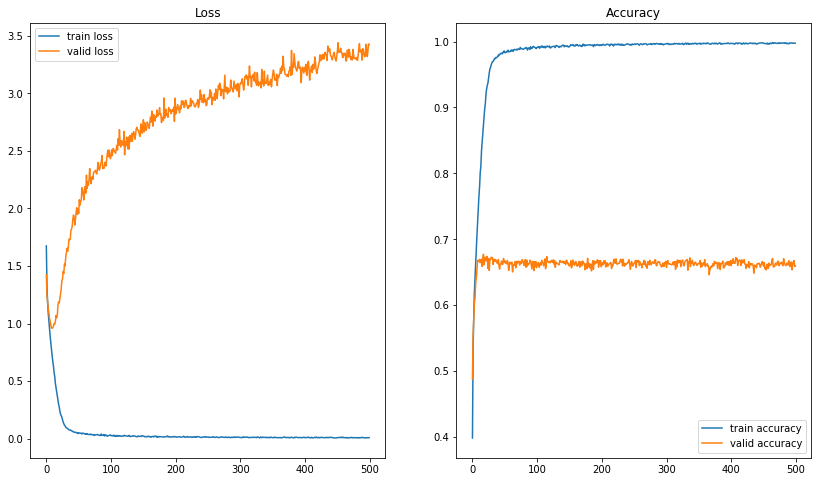

Training history of  SGD


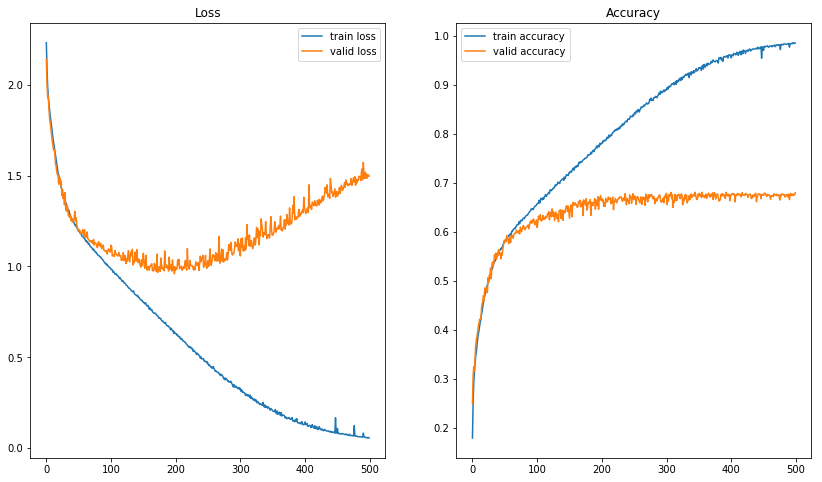

In [21]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

for md in enumerate(model_name):
    print('Training history of ', md[1])
    plt.figure(figsize=(14, 8))
    train_loss = models[md[0]].history.history["loss"]
    valid_loss = models[md[0]].history.history["val_loss"]
    
    train_acc = models[md[0]].history.history["acc"]
    valid_acc = models[md[0]].history.history["val_acc"]
    
    plt.subplot(121)
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")

    plt.subplot(122)
    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()